# (Analyzing Police Activity)
## by (Mazen Sayed)

## Investigation Overview

> In this presentation I'll communicate my findings of the police datasets.

## Dataset Overview

> The data is collected to analyize traffic stops and what affects a police officers to take an action
> Source : http://openpolicing.stanford.edu/ 
#### The data consists of 2 csv file and a merged dataset from the 2 datasets:
- police.csv : contains the date for each stop,driver gender,driver race,violation,arrested or not and other many
- weather_subset : contains date and temparture at this date
- police_weather : merged dataset from the previous two ,in order to analyze police activity with weather

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
police = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')
weather = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv')
weather = weather.loc[:,['DATE','TMIN','TMAX']]

# merging the 2 datasets on the date column
police_weather = pd.merge(left=police, right=weather, left_on='stop_date', right_on='DATE', how='left')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Drivers gender in rhode island)

###### It seems that males have stewardship over females in rhode island :)

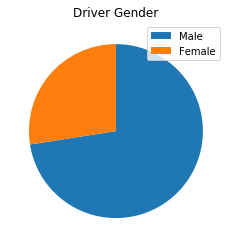

In [4]:
sorted_counts = police_weather['driver_gender'].value_counts()
plt.pie(sorted_counts, startangle = 90,
        counterclock = False);
plt.legend(['Male','Female']);
plt.title("Driver Gender");

## (Common violation)

> What do you think the most violation people do?

###### From the plot it seems that speeding is the most violation done

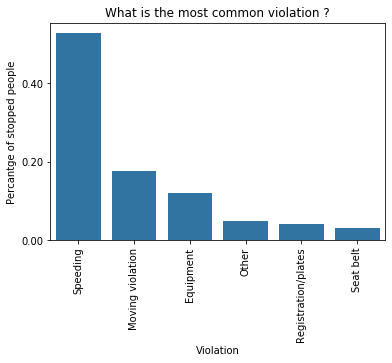

In [5]:
order = police_weather.violation.value_counts().index
base_color = sb.color_palette()[0]

max_count = police_weather['violation'].value_counts().max()
max_prop = max_count / len(police_weather)

tick_props = np.arange(0, max_prop, 0.2)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

sb.countplot(data = police_weather, x = 'violation', color = base_color,order = order);
plt.xticks(rotation = 90);
plt.yticks(tick_props * len(police_weather), tick_names)
plt.ylabel('Percantge of stopped people');
plt.xlabel('Violation')
plt.title("What is the most common violation ?");

## (Males vs Females violations)
> Is there a relationship between the gender and violation made ? 

###### From the plot it seems that females are reckless drivers

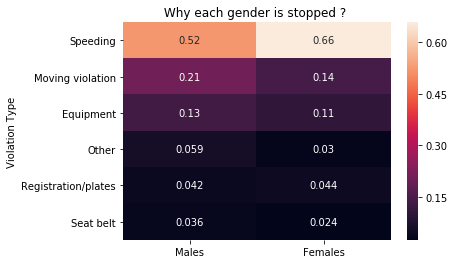

In [6]:
males_violations = police_weather[police_weather['driver_gender'] == 'M'].violation
females_violations = police_weather[police_weather['driver_gender'] == 'F'].violation

males_proportion = males_violations.value_counts() / len(males_violations)
females_proportion = females_violations.value_counts() / len(females_violations)
mixed = pd.DataFrame([males_proportion,females_proportion]).T
mixed.columns = ['Males','Females']

sb.heatmap(mixed,annot = True);
plt.ylabel('Violation Type')
plt.title(' Why each gender is stopped ?  ');

## (Driver race and arrestance rate)
> Is there a relationship between the driver's race and arrestance ?

###### From the plot maybe they are racist ! or just Black and Hispanic race make more violations there

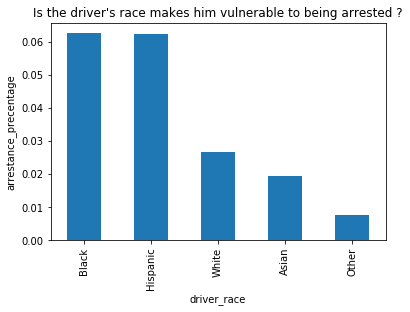

In [7]:
ct_counts = police_weather.groupby(['is_arrested', 'driver_race']).size()
ct_counts = ct_counts.reset_index()
ct_counts = ct_counts.pivot(index = 'driver_race', columns = 'is_arrested')
ct_counts.columns = ['not_arrested','arrested']
ct_counts['arrested_percentage'] = ct_counts.arrested / ct_counts.sum(axis=1)

order = ct_counts.arrested_percentage.value_counts().index
ct_counts = ct_counts.sort_values('arrested_percentage')[::-1]
ct_counts['arrested_percentage'].plot(kind='bar');
plt.ylabel('arrestance_precentage');
plt.title("Is the driver's race makes him vulnerable to being arrested ?");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!